In [1]:
from citipy import citipy
import pandas as pd
import requests
from config import api_key
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import json

In [2]:
lat_lng = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lats, lngs)

for lat_lngs in lat_lng:
    city = citipy.nearest_city(lat_lngs[0], lat_lngs[1]).city_name
    

    if city not in cities:
        cities.append(city)


len(cities)

573

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

data= []



for i, city in enumerate(cities):
   
    response = requests.get(query_url + city).json()

    try:
        cloudyness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        wind_speed = response['wind']['speed']
        max_temp = response['main']['temp_max']
        lat = response['coord']['lat']
        lng = response['coord']['lon']

        
        data.append({
            'City': city,
            'Cloudiness': cloudyness,
            'Country': country,
            'Date': date,
            'Humidity': humidity,
            'Lat': lat,
            'Lng': lng,
            'Max_Temp': max_temp,
            'Wind_Speed': wind_speed
        })
        print(f"Processing Data -> Count {i+1}: {city}")
    except:
        print(f'Processing Data -> Count {i+1}: Could Not Retrieve Data')


print("_________________")
print("Data Processed!!!")


    
   







Processing Data -> Count 1: krasnyy yar
Processing Data -> Count 2: butaritari
Processing Data -> Count 3: camacha
Processing Data -> Count 4: port hardy
Processing Data -> Count 5: ushuaia
Processing Data -> Count 6: luanda
Processing Data -> Count 7: birjand
Processing Data -> Count 8: vardo
Processing Data -> Count 9: mahebourg
Processing Data -> Count 10: vaini
Processing Data -> Count 11: tuktoyaktuk
Processing Data -> Count 12: gizo
Processing Data -> Count 13: mataura
Processing Data -> Count 14: ribeira grande
Processing Data -> Count 15: port hedland
Processing Data -> Count 16: boueni
Processing Data -> Count 17: southport
Processing Data -> Count 18: bhiwani
Processing Data -> Count 19: hilo
Processing Data -> Count 20: luderitz
Processing Data -> Count 21: grindavik
Processing Data -> Count 22: malindi
Processing Data -> Count 23: nikolskoye
Processing Data -> Count 24: deputatskiy
Processing Data -> Count 25: nago
Processing Data -> Count 26: atuona
Processing Data -> Coun

Processing Data -> Count 209: nipawin
Processing Data -> Count 210: eyrarbakki
Processing Data -> Count 211: mbuji-mayi
Processing Data -> Count 212: koungou
Processing Data -> Count 213: miracatu
Processing Data -> Count 214: rawson
Processing Data -> Count 215: hinton
Processing Data -> Count 216: kahului
Processing Data -> Count 217: karratha
Processing Data -> Count 218: Could Not Retrieve Data
Processing Data -> Count 219: reitz
Processing Data -> Count 220: svetlogorsk
Processing Data -> Count 221: tessalit
Processing Data -> Count 222: progreso
Processing Data -> Count 223: acapulco
Processing Data -> Count 224: tecoanapa
Processing Data -> Count 225: Could Not Retrieve Data
Processing Data -> Count 226: torbay
Processing Data -> Count 227: santa vitoria do palmar
Processing Data -> Count 228: riyadh
Processing Data -> Count 229: ardahan
Processing Data -> Count 230: dafeng
Processing Data -> Count 231: vostok
Processing Data -> Count 232: saint-francois
Processing Data -> Count

Processing Data -> Count 412: rosarito
Processing Data -> Count 413: monroe
Processing Data -> Count 414: bonavista
Processing Data -> Count 415: asau
Processing Data -> Count 416: zhongshu
Processing Data -> Count 417: Could Not Retrieve Data
Processing Data -> Count 418: constitucion
Processing Data -> Count 419: kirovohrad
Processing Data -> Count 420: rio cuarto
Processing Data -> Count 421: jaicos
Processing Data -> Count 422: neftekamsk
Processing Data -> Count 423: parati
Processing Data -> Count 424: nelson bay
Processing Data -> Count 425: levokumka
Processing Data -> Count 426: sao sebastiao
Processing Data -> Count 427: havelock
Processing Data -> Count 428: maneadero
Processing Data -> Count 429: carmarthen
Processing Data -> Count 430: usta muhammad
Processing Data -> Count 431: kieta
Processing Data -> Count 432: goundam
Processing Data -> Count 433: uige
Processing Data -> Count 434: sergeyevka
Processing Data -> Count 435: Could Not Retrieve Data
Processing Data -> Coun

In [4]:
city_df = pd.DataFrame(data)

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,krasnyy yar,94,RU,1642701785,88,46.5331,48.3456,15.73,6.08
1,butaritari,79,KI,1642701209,71,3.0707,172.7902,81.66,17.43
2,camacha,20,PT,1642701785,55,33.0833,-16.3333,63.36,24.16
3,port hardy,100,CA,1642701291,93,50.6996,-127.4199,44.76,10.36
4,ushuaia,1,AR,1642701100,33,-54.8000,-68.3000,67.62,4.43


In [135]:
def make_graph(data_name,title=None, axis_title=None, linear = False, needs_hemishpere=None, graph_type='scatter', r_sqrd = True):
    if graph_type.upper() == 'SCATTER':
        if needs_hemishpere == 'N' :
            df = city_df[city_df['Lng'] >= 0.000000001]
            x = df['Lng']
            y = df[data_name]
            print(len(x), len(y))
            
        elif needs_hemishpere == 'S':
            df = city_df[city_df['Lng'] <= 0.000000001]
            x = df['Lng']
            y = df[data_name]
            print(len(x), len(y))
        else:
            x = city_df['Lng']
            y = city_df[data_name]
            print(len(x), len(y))

        plt.scatter(x, y, c='#0049B6', edgecolors='k')
        if title != None:
            plt.title(title)
        if axis_title != None:
            plt.xlabel(axis_title[0])
            plt.ylabel(axis_title[1])
        if linear == True:
            (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
            regress_values = x * slope + intercept
            line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
            plt.plot(x,regress_values,"r-")
            plt.annotate(line_eq,(6,10),fontsize=15,color="red")
            if r_sqrd:
                print(f'the r-squared value is: {rvalue}')


    plt.show()

529 529


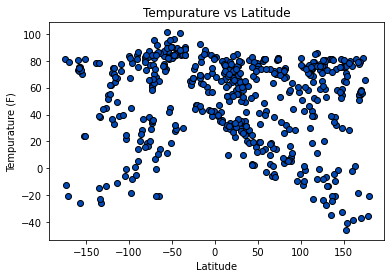

In [136]:
make_graph('Max_Temp', title='Tempurature vs Latitude', axis_title=['Latitude', 'Tempurature (F)'])

529 529


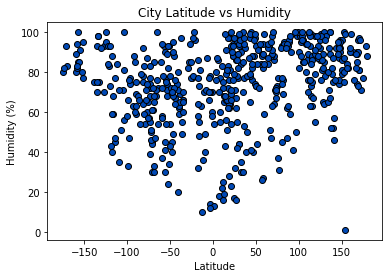

In [137]:
make_graph('Humidity', title='City Latitude vs Humidity', axis_title=['Latitude', 'Humidity (%)'])

529 529


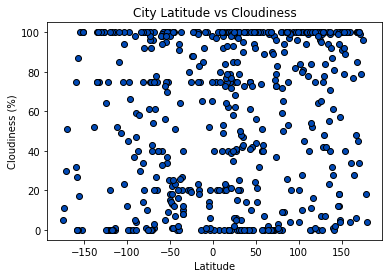

In [138]:
make_graph('Cloudiness', title='City Latitude vs Cloudiness', axis_title=['Latitude', 'Cloudiness (%)'])

529 529


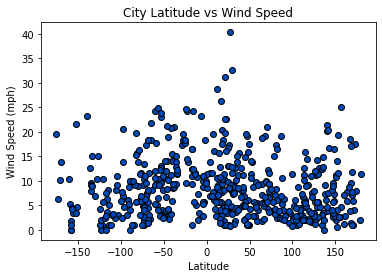

In [139]:
make_graph('Wind_Speed', title='City Latitude vs Wind Speed', axis_title=['Latitude', 'Wind Speed (mph)'])

322 322
the r-squared value is: -0.1635995683346259


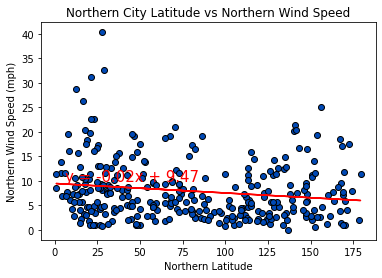

In [140]:
make_graph('Wind_Speed', title='Northern City Latitude vs Northern Wind Speed', axis_title=['Northern Latitude', 
                    'Northern Wind Speed (mph)'], linear=True, needs_hemishpere='N')

322 322
the r-squared value is: 0.28743410918490364


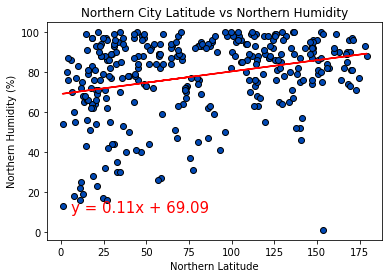

In [141]:
make_graph('Humidity', title='Northern City Latitude vs Northern Humidity', axis_title=['Northern Latitude', 
                    'Northern Humidity (%)'], linear=True, needs_hemishpere='N')

322 322
the r-squared value is: 0.14094750620401897


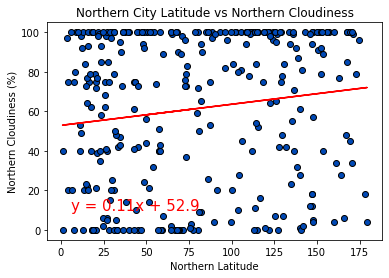

In [142]:
make_graph('Cloudiness', title='Northern City Latitude vs Northern Cloudiness', axis_title=['Northern Latitude', 
                    'Northern Cloudiness (%)'], linear=True, needs_hemishpere='N')

322 322
the r-squared value is: -0.1415977161556681


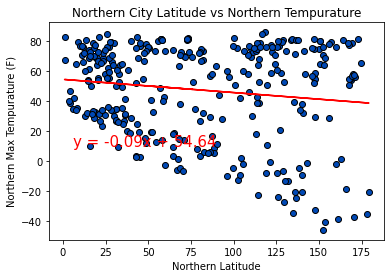

In [143]:
make_graph('Max_Temp', title='Northern City Latitude vs Northern Tempurature', axis_title=['Northern Latitude', 
                    'Northern Max Tempurature (F)'], linear=True, needs_hemishpere='N')

207 207
the r-squared value is: 0.3116061894491224


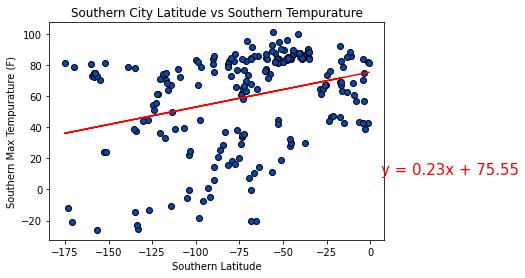

In [144]:
make_graph('Max_Temp', title='Southern City Latitude vs Southern Tempurature', axis_title=['Southern Latitude', 
                    'Southern Max Tempurature (F)'], linear=True, needs_hemishpere='S')

207 207
the r-squared value is: 0.020911205024104842


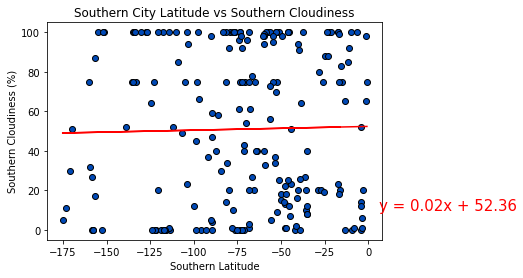

In [145]:
make_graph('Cloudiness', title='Southern City Latitude vs Southern Cloudiness', axis_title=['Southern Latitude', 
                    'Southern Cloudiness (%)'], linear=True, needs_hemishpere='S')

207 207
the r-squared value is: -0.2896191757835943


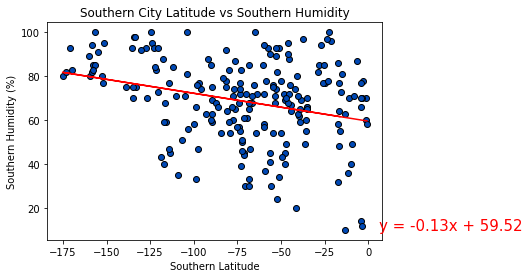

In [146]:
make_graph('Humidity', title='Southern City Latitude vs Southern Humidity', axis_title=['Southern Latitude', 
                    'Southern Humidity (%)'], linear=True, needs_hemishpere='S')

207 207
the r-squared value is: 0.26838502710526035


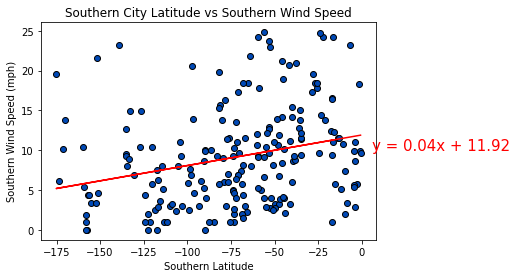

In [147]:
make_graph('Wind_Speed', title='Southern City Latitude vs Southern Wind Speed', axis_title=['Southern Latitude', 
                    'Southern Wind Speed (mph)'], linear=True, needs_hemishpere='S')

In [152]:
city_df.to_csv('city_data.csv', encoding='utf-8', index=False)
print("csv file saved")

csv file saved
